In [1]:
import pyEX as p
import tributary as t

In [2]:
def sma_close(data):
    dat = [x['close'] for x in data]
    return sum(dat)/len(dat)
    
def crosses(state, data):
    sma_short = data[0]
    sma_long = data[1]

    if state.golden:
        # short moved above long
        if sma_short < sma_long:
            state.golden = False
    else:
        # long moved above short
        if sma_short > sma_long:
            state.golden = True
            
    # clean output data
    data = data[2]
    data['sma_short'] = sma_short
    data['sma_long'] = sma_long
    return data

In [3]:
# data source
data = t.Delay(t.UnrollDataFrame(p.chartDF('tsla', '6m')), .1)

# windows
window1 = t.Window(data, size=3, full_only=False)
window2 = t.Window(data, size=20, full_only=False)

# avgs
sma1 = t.Apply(sma_close, window1)
sma2 = t.Apply(sma_close, window2)

# merge streams
merged = t.Reduce(sma1, sma2, data)

calc = t.Apply(t.State(crosses, golden=False), merged)
# psp = t.Print(calc)
psp = t.Perspective(calc, columns=['close', 'sma_short', 'sma_long'], view='y_line', rowpivots=['index'])

In [ ]:
t.run(psp)

{u'volume': 7967370, 'index': u'2018-03-14', 'sma_long': 326.63, u'changePercent': -4.449, u'label': u'Mar 14, 18', u'high': 339.81, u'vwap': 331.027, u'low': 323.93, 'sma_short': 326.63, u'close': 326.63, u'changeOverTime': 0.0, u'open': 336.76, u'unadjustedVolume': 7967370, u'change': -15.21}
{u'volume': 6564801, 'index': u'2018-03-15', 'sma_long': 326.115, u'changePercent': -0.315, u'label': u'Mar 15, 18', u'high': 332.85, u'vwap': 326.3731, u'low': 321.1, 'sma_short': 326.115, u'close': 325.6, u'changeOverTime': -0.003153415179254731, u'open': 329.38, u'unadjustedVolume': 6564801, u'change': -1.03}
{u'volume': 6117279, 'index': u'2018-03-16', 'sma_long': 324.5266666666667, u'changePercent': -1.305, u'label': u'Mar 16, 18', u'high': 327.4, u'vwap': 322.1464, u'low': 319.07, 'sma_short': 324.5266666666667, u'close': 321.35, u'changeOverTime': -0.01616507975384984, u'open': 325.96, u'unadjustedVolume': 6117279, u'change': -4.25}
{u'volume': 7484294, 'index': u'2018-03-19', 'sma_long':

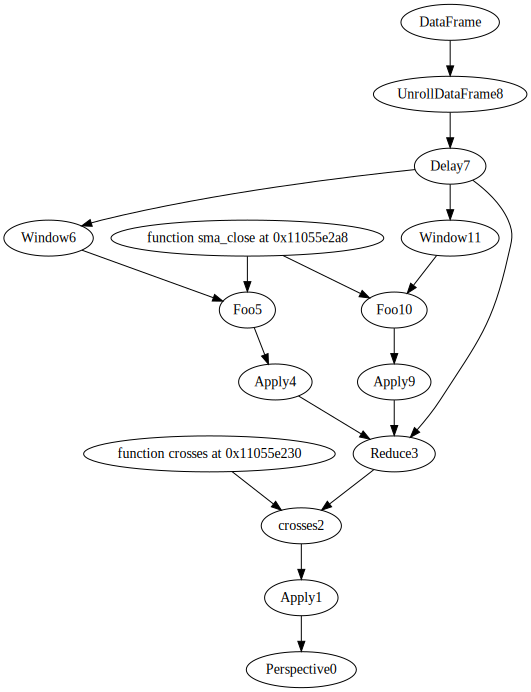

In [5]:
t.GraphViz(psp)